# Introduction to Machine Learning, UZH 2018, Group Project
### Group 2: Barbara Capl, Mathias Lüthi, Pamela Matias, Stefanie Rentsch
##       
# 3. Prediction with Multiple Logistic Regression

In this section we use the feature matrices and response vectors with features selected in chapter 2.  

#### We use two different versions (created in chapter 1, features-selected in chapter 2):
Version 1: Feature Matrix consists only of the Ratios                                                                        
Version 2: Feature Matrix consists of Ratios + dummy variables for seasonality + other market data
####  

In [1]:
# hide unnecessary warnings ("depreciation" of packages etc.)
import warnings
warnings.filterwarnings('ignore')

# Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.style.use("seaborn-whitegrid")
%matplotlib inline

## 3.0. Choose which Feature Matrix (Version 1 or 2) you want to load in by choosing the Case



#### 1) Choose the Dataset Version you want
VERSION = 1; Feature Matrix with only ratios                                  
VERSION = 2;  Feature Matrix with ratios + saisonality + other market data


In [2]:
### Choose which dataset version you want the selection of features and the prediction to be based on 
VERSION = 1
"""
INSERT NUMBER 1 or 2
"""


# Define sel_state variable for easier printing out    
if VERSION == 1:
    sel_version = 'Based on Dataset with only the Ratios Dataset as predicive Features'
elif VERSION == 2:
    sel_version = 'Based on Dataset with Ratios + Seasonality + other Market Data as predictive Features'
else: raise ValueError('VERSION must be either 1 or 2')

#### 2) Choose with which method you want to have the features been pre-selected
SELECTON  = RF ; Features pre-selected with Random Forest Classifier                                                           
SELECTION = PCA; Features pre-selected with Principal Component Analysis (PCA)

In [3]:
### Choose whether you want the datasets with features selected with RF or PCA
SELECTION = 'RF'
"""
INSERT 'RF' OR 'PCA'
"""


# Define sel_state variable for easier printing out    
if SELECTION == 'RF':
    sel_feat = 'Random Forest (RF)'
elif SELECTION == 'PCA':
    sel_feat = 'Principal Component Analysis (PCA)'
else: raise ValueError('SELECTION must be either RF or PCA')

## 3.1. Preparation

### 3.1.1. Import the Response Vector and the Feature Matrix

In [4]:
# import Data (already splitted to train/test-data and selected features-> bc_randomforest_feature_selection)
if VERSION == 1:
    if SELECTION == 'RF':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X1_train_f.csv', sep=',')
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X1_test_f.csv', sep=',')
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y1_train_f.csv', sep=',')
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y1_test_f.csv', sep=',')
    elif SELECTION == 'PCA':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/X1_train_p.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/X1_test_p.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/y1_train_p.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/y1_test_p.csv', sep=',', header=0)
elif VERSION == 2:
    if SELECTION == 'RF':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X2_train_f.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X2_test_f.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y2_train_f.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y2_test_f.csv', sep=',', header=0)
    elif SELECTION == 'PCA':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/X2_train_p.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/X2_test_p.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/y2_train_p.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/y2_test_p.csv', sep=',', header=0)
else: raise ValueError('_VERSION_ value must be either 1 or 2, _SELECTION_ must be either RF or PCA')   

### 3.1.2. Print out Shape and Form of Feature Matrix and Response Vector

### Train Set

In [5]:
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version))

print("")
print('Shape (rows, columns) of Feature Matrix X (Train) ' + '=' + str(X_train_s.shape))
print("")

print('Feature Matrix X (Train) with Selected Features')
display(X_train_s[0:3])
print("")

print('Response Vector y (Train) after Feature Selection')
display(y_train_s[0:3])
print("")

Features Selected with Random Forest (RF)
Version 1; Based on Dataset with only the Ratios Dataset as predicive Features

Shape (rows, columns) of Feature Matrix X (Train) =(2836, 15)

Feature Matrix X (Train) with Selected Features


,CAPEI,pcf,pe_op_basic,bm,ptb,PEG_ltgforward,evm,ps,pe_exi,divyield,PEG_1yrforward,pe_inc,invt_act,pe_op_dil,roce
0,20.773,9.957,15.468,0.547,1.811,5.963,10.644,3.703,18.484,0.0354,13.678,18.484,0.108,15.633,0.140
1,25.089,8.509,17.203,0.461,2.189,5.702,9.246,0.689,39.232,0.0398,1.521,39.232,0.368,17.296,0.105
2,12.337,1.993,9.135,0.911,1.076,2.248,12.474,2.034,13.062,0.0268,0.380,13.062,0.152,9.209,0.075



Response Vector y (Train) after Feature Selection


,0
0,0
1,1
2,0


### Test Set

In [6]:
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version))

print("")
print('Shape (rows, columns) of Feature Matrix X (Test) ' + '=' + str(X_test_s.shape))
print("")

print('Feature Matrix X (Train) with Selected Features')
display(X_test_s[0:3])
print("")

print('Response Vector y (Test) after Feature Selection')
display(y_test_s[0:3])
print("")

Features Selected with Random Forest (RF)
Version 1; Based on Dataset with only the Ratios Dataset as predicive Features

Shape (rows, columns) of Feature Matrix X (Test) =(710, 15)

Feature Matrix X (Train) with Selected Features


,CAPEI,pcf,pe_op_basic,bm,ptb,PEG_ltgforward,evm,ps,pe_exi,divyield,PEG_1yrforward,pe_inc,invt_act,pe_op_dil,roce
0,20.983,10.484,16.127,0.254,4.189,1.330,8.585,3.318,16.224,0.0187,1.414,16.224,0.025,16.224,0.364
1,21.663,7.709,16.311,0.235,4.281,1.572,13.619,2.379,18.555,0.0122,1.737,18.555,0.157,16.489,0.108
2,16.327,8.490,9.520,0.513,2.198,6.149,6.716,3.293,15.681,0.0343,-0.973,15.550,0.078,9.520,0.196



Response Vector y (Test) after Feature Selection


,0
0,1
1,0
2,1


## 3.2. Simple Logistic Regression (statsmodels) (SLM)

### 3.2.1. Preparation and fitting (on Training Set) , define BEST FEATURE (SLM)

In [7]:
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version))
print("")

# Run Simple Logistic Regression
# Logistic Regression (with the most important feature from feature selection)
# Assign "best_feature" to matrix X and response to y, acording to chosen Version of datasets and feature Selection method
if VERSION == 1:
    if SELECTION == 'RF':
        best_feature = 'CAPEI'
        logReg = sm.Logit(endog = y_train_s, exog= sm.add_constant(X_train_s[[best_feature]])).fit()
    elif SELECTION == 'PCA':
        best_feature = None
        print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')
elif VERSION == 2:
    if SELECTION == 'RF':
        best_feature = 'RET'
        logReg = sm.Logit(endog = y_train_s, exog= sm.add_constant(X_train_s[[best_feature]])).fit()
    elif SELECTION == 'PCA':
        best_feature = None
        print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')
print("")

Features Selected with Random Forest (RF)
Version 1; Based on Dataset with only the Ratios Dataset as predicive Features

Optimization terminated successfully.
         Current function value: 0.676629
         Iterations 6



### 3.2.2. Summary (SLM)

In [8]:
# Workaround solution for error ("AttributeError: module 'scipy.stats' has no attribute 'chisqprob'")
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [9]:
# LogReg with only one feature as exogen variable
if SELECTION == 'RF':
    print(logReg.summary())
    print("")
    print('logReg pvalues: ')
    print("")
    print(logReg.pvalues)
elif SELECTION == 'PCA':
    print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')

                           Logit Regression Results                           
Dep. Variable:                      0   No. Observations:                 2836
Model:                          Logit   Df Residuals:                     2834
Method:                           MLE   Df Model:                            1
Date:                Wed, 11 Apr 2018   Pseudo R-squ.:                0.005030
Time:                        09:53:42   Log-Likelihood:                -1918.9
converged:                       True   LL-Null:                       -1928.6
                                        LLR p-value:                 1.060e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0841      0.077      1.094      0.274      -0.067       0.235
CAPEI          0.0121      0.003      3.577      0.000       0.005       0.019

logReg pvalues: 

const    0.274153
CAPEI    0.0003

### 3.2.3. Assessing Output (SLM)

### Hypothesis testing / Confidence Interval

In [10]:
significance_level = 0.01

if SELECTION == 'RF':
    print("")
    print(str(int(100 - significance_level*100)) + '% Confidence Interval (Significance Level ' 
          + str(int(significance_level*100)) + '%)')
    logReg.conf_int(alpha=significance_level)
elif SELECTION == 'PCA':
    print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')


99% Confidence Interval (Significance Level 1%)


### Confusion Matrix

In [11]:
if SELECTION == 'RF':
    logReg.pred_table(threshold=0.5)
elif SELECTION == 'PCA':
    print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')


### 3.2.2. Prediction (SML)

### A: In-sample Prediction of probability for returns going UP in the next period (predict y_train)


#### For whole Training Set

In [12]:
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version))
print("")

# X must include 1 in first column for intercept
# we wish to get the probability of 'UP' (=1) for the whole test set
if SELECTION == 'RF':
    pred_train_all = logReg.predict(sm.add_constant(X_train_s[best_feature]))
    print('Predicted probability of price going UP for whole Feature Train Set is: ')
    display(pred_train_all.head(3))
    display(y_train_s.head(3))
elif SELECTION == 'PCA':
    print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')

Features Selected with Random Forest (RF)
Version 1; Based on Dataset with only the Ratios Dataset as predicive Features

Predicted probability of price going UP for whole Feature Train Set is: 


0    0.582867
1    0.595464
2    0.557944
dtype: float64

,0
0,0
1,1
2,0


### B: New-sample Prediction of probability for returns going UP in the next period (predict y_test)

#### For chosen value of predictive variable


In [13]:
# X must include 1 in first column for intercept
# we wish to get the probability of 'UP' (=1) for a best_feature_value of USD 15

# Print Text
print("")
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version))
print("")
print('Chosen best feature = ' + str(best_feature))

# Loop for Version differenciation
if VERSION == 1:
    if SELECTION == 'RF':
        best_feature_value = 15
        print('Chosen value of best feature = ' + str(best_feature_value))
        print("")
        pred_test_one = logReg.predict([1, best_feature_value])
        ratio_response_train = y_train_s.sum() / y_train_s.size
        print('Predicted probability of price going UP with chosen ' + str(best_feature) + ' value is: '
              + str("%.4f" % round(float(pred_test_one*100),4)) + '%')
        print('Ratio of "UP" (Train)  =  ' + str("%.4f" % round(float(ratio_response_train*100),4)) + '%')
    elif SELECTION == 'PCA':
        print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')  
elif VERSION == 2:
        if SELECTION == 'RF':
            best_feature_value = 0.02
            print('Chosen value of best feature = ' + str(best_feature_value))
            print("")
            pred_test_one = logReg.predict([1, best_feature_value])
            ratio_response_train = y_train_s.sum() / y_train_s.size
            print('Predicted probability of price going UP with chosen ' + str(best_feature) + ' value is: '
                  + str("%.4f" % round(float(pred_test_one*100),4)) + '%')
            print('Ratio of "UP" (Train)  =  ' + str("%.4f" % round(float(ratio_response_train*100),4)) + '%')
        elif SELECTION == 'PCA':
            print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')


Features Selected with Random Forest (RF)
Version 1; Based on Dataset with only the Ratios Dataset as predicive Features

Chosen best feature = CAPEI
Chosen value of best feature = 15

Predicted probability of price going UP with chosen CAPEI value is: 56.5849%
Ratio of "UP" (Train)  =  58.0748%


#### For whole Test Set

In [14]:
print("")
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version))
print("")

# we wish to get the probability of 'UP' (=1) for the whole test set
if SELECTION == 'RF':
    pred_test_all = logReg.predict(sm.add_constant(X_test_s[[best_feature]]))
    print("")
    print('Predicted probability of price going UP for whole Feature Test Set is: ')
    display(pred_test_all.head(3))
    display(y_test_s.head(3))
elif SELECTION == 'PCA':
    print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')    


Features Selected with Random Forest (RF)
Version 1; Based on Dataset with only the Ratios Dataset as predicive Features


Predicted probability of price going UP for whole Feature Test Set is: 


0    0.583482
1    0.585474
2    0.569776
dtype: float64

,0
0,1
1,0
2,1


### 3.2.3. Plot Results (SLM)


Features Selected with Random Forest (RF)
Version 1; Based on Dataset with only the Ratios Dataset as predicive Features

Chosen best feature = CAPEI



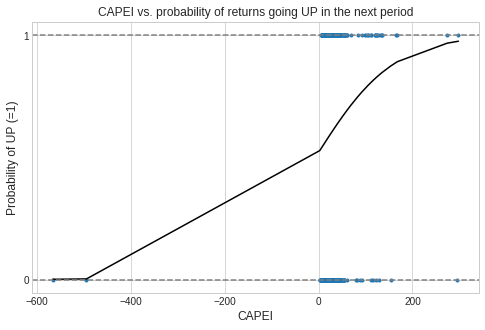

In [15]:
print("")
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version))
print("")
print('Chosen best feature = ' + str(best_feature))
print("")

# Plot scatter and log.Reg
if SELECTION == 'RF':
    
    # Transfer best_feature column an prediction for response vector in a newly made dataframe "res"
    res = pd.DataFrame()
    res['best_feature'] = X_train_s[best_feature]
    res['pred'] = logReg.predict()

    # Sort results by values of the best_feature column
    res = res.sort_values('best_feature')
    plt.figure(figsize =(8,5))
    plt.scatter(X_train_s[best_feature], y_train_s, marker ='.')
    plt.plot(res.best_feature, res.pred, c = 'k')
    plt.axhline(y=0, color = "gray", linestyle = "dashed")
    plt.axhline(y=1, color = "gray", linestyle = "dashed")
    plt.ylabel("Probability of UP (=1)", fontsize =12)
    plt.xlabel(str(best_feature), fontsize =12)
    plt.title(str(best_feature) + ' vs. probability of returns going UP in the next period');
    
elif SELECTION == 'PCA':
    print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')
    
else: raise ValueError('VERSION value must be either 1 or 2, SELECTION must be either RF or PCA')  

## 3.3. Multiple Logistic Regression with n pre-selected features (MLR1)

### 3.3.1. Preparation and fitting (on Training Set) (MLR1)

In [16]:
## Multiple Log. Regression (with all n best features chosen in Chapter 2 in the feature selection process)
logReg_m = sm.Logit(endog = y_train_s, exog = sm.add_constant(X_train_s)).fit() 

Optimization terminated successfully.
         Current function value: 0.651438
         Iterations 8


### 3.3.2. Summary (MLR1)

In [17]:
print("")
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version))
print("")
print("Multiple Logistic Regression with all selected features")
print("")

# Workaround solution for error ("AttributeError: module 'scipy.stats' has no attribute 'chisqprob'")
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# Run Multiple Logistic Regression
print(logReg_m.summary().tables[0])
print(logReg_m.summary().tables[1])


Features Selected with Random Forest (RF)
Version 1; Based on Dataset with only the Ratios Dataset as predicive Features

Multiple Logistic Regression with all selected features

                           Logit Regression Results                           
Dep. Variable:                      0   No. Observations:                 2836
Model:                          Logit   Df Residuals:                     2820
Method:                           MLE   Df Model:                           15
Date:                Wed, 11 Apr 2018   Pseudo R-squ.:                 0.04207
Time:                        09:53:43   Log-Likelihood:                -1847.5
converged:                       True   LL-Null:                       -1928.6
                                        LLR p-value:                 8.580e-27
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2

### 3.3.3. Assessing Output (MLR1)

### Hypothesis testing / Confidence Interval

In [18]:
significance_level = 0.01

# Print Confidence Interval with Title
print("")
print(str(int(100 - significance_level*100)) + '% Confidence Interval (Significance Level ' 
      + str(int(significance_level*100)) + '%)')
display(logReg_m.conf_int(alpha=significance_level))


99% Confidence Interval (Significance Level 1%)


,0,1
const,-1.076355,0.608485
CAPEI,-0.000562,0.016355
pcf,-0.008289,0.014581
pe_op_basic,-0.387846,0.210863
bm,1.078202,2.478454
ptb,0.086577,0.221048
PEG_ltgforward,-0.020874,0.046454
evm,-0.097374,-0.043704
ps,0.122865,0.339222
pe_exi,-0.000992,0.019895


### Confusion Matrix

In [19]:
logReg_m.pred_table(threshold=0.5)

array([[ 364.,  825.],
       [ 259., 1388.]])

### 3.3.4. Prediction (MLR1)
Multiple Logistic Regression 1 (pre-selected features with RandomForest in Chapter 2) 

### A: In-sample Prediction of probability for returns going UP in the next period (predict y_train)

#### For whole Training Set


In [20]:
print("")
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version))
print("")

# Get the probability of 'UP' (=1) for the whole training set
pred_train_all = logReg_m.predict(sm.add_constant(X_train_s))

# Print Prediction and Response Vector, with Title
print("")
print('Predicted probabilities of price going UP for whole Feature Set (Train) are: ')
display(pred_train_all[0:3])
print("")
print('Response Vector (Train): ')
display(y_train_s[0:3])


Features Selected with Random Forest (RF)
Version 1; Based on Dataset with only the Ratios Dataset as predicive Features


Predicted probabilities of price going UP for whole Feature Set (Train) are: 


0    0.699485
1    0.501512
2    0.682452
dtype: float64


Response Vector (Train): 


,0
0,0
1,1
2,0


### B: New-sample Prediction of probability for returns going UP in the next period (predict y_test)

#### For whole Test Set


In [21]:
print("")
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version))
print("")

# Get the probability of 'UP' (=1) for the whole test set
pred_test_all = logReg_m.predict(sm.add_constant(X_test_s))

# Print Prediction and Response Vector, with Title
print("")
print('Predicted probability of price going UP for whole Feature Set (Test) is: ')
display(pred_test_all.head(3))
print("")
print('Response Vector (Test): ')
display(y_test_s.head(3))


Features Selected with Random Forest (RF)
Version 1; Based on Dataset with only the Ratios Dataset as predicive Features


Predicted probability of price going UP for whole Feature Set (Test) is: 


0    0.615165
1    0.615856
2    0.654717
dtype: float64


Response Vector (Test): 


,0
0,1
1,0
2,1


In [22]:
# compare LogReg with only one feature as exogen variable & LogReg 1 
# (explicitly Log-Likelihood values-> is there an improvement? (smaller values are prefered!))

In [23]:
# Check for non significant values (p-value > 0.05) and the Log-Likelihood value

## 3.4. Multiple Logistic Regression with only significant features (MLR2)

Apply an other multiple logistic regression on a transformed dataset with only all significant values from LogReg_m (above)

### 3.4.1. Extract significant features (MLR2)

In [24]:
# extracting significant features with an alpha-boundery of 0.05
condition = np.where(logReg_m.pvalues < 0.05)
print('"Condition" array with index starting with intercept:')
display(condition)

# Subtract '1' fom every entry in the numpy array "condition", because in logReg index 0 starts with the intercept
# but in the X_train_s set the index 0 starts with the first feature already
# otherwise there would be an error "index out of range" when we would try to apply the condition to the X_train_s set
condition_m = np.subtract(condition, 1)
print('"Condition" array with index starting with the first feature, leaving intercept out of the counting:')
display(condition_m)

# Print Significant Features
if SELECTION == 'RF':
    # In one single step: extract cosen columns of X_train_s dataset, 
    # convrt np.array to list
    # because of "double-brackets"; extract the only column (0), which is the "list inside of the list"
    sign_features = X_train_s.columns.values[condition_m].tolist()[0]
    print("")
    print('Features that were significant in the previous MLR in chapter 3.3.:')
    print("")
    print(sign_features)
elif SELECTION == 'PCA':
    print('PCA: gives "IndexError: index 10 is out of bounds for axis 1 with size 10"')
else: raise ValueError('SELECTION must be either RF or PCA')

"Condition" array with index starting with intercept:


(array([ 1,  4,  5,  7,  8,  9, 10, 12, 15]),)

"Condition" array with index starting with the first feature, leaving intercept out of the counting:


array([[ 0,  3,  4,  6,  7,  8,  9, 11, 14]])


Features that were significant in the previous MLR in chapter 3.3.:

['CAPEI', 'bm', 'ptb', 'evm', 'ps', 'pe_exi', 'divyield', 'pe_inc', 'roce']


### 3.4.2. Preparation and fitting (on Training Set) (MLR2)

In [26]:
## Multiple Log. Regression (with significant features from logreg above)
# Assign features to X and response vector y


if SELECTION == 'RF':
    logReg_mm = sm.Logit(endog = y_train_s, exog=sm.add_constant(X_train_s[sign_features])).fit()
elif SELECTION == 'PCA':
    print('PCA: could not define sign_features above')
else: raise ValueError('SELECTION must be either RF or PCA')

Optimization terminated successfully.
         Current function value: 0.654051
         Iterations 6


### 3.4.3. Summary (MLR2)

In [27]:
if SELECTION == 'RF':
    print("")
    print("Multiple Logistic Regression with selected significant features")
    print("")
    print(logReg_mm.summary().tables[0])
    print(logReg_mm.summary().tables[1])
elif SELECTION == 'PCA':
    print('PCA: could not define sign_features above')
else: raise ValueError('SELECTION must be either RF or PCA')


Multiple Logistic Regression with selected significant features

                           Logit Regression Results                           
Dep. Variable:                      0   No. Observations:                 2836
Model:                          Logit   Df Residuals:                     2826
Method:                           MLE   Df Model:                            9
Date:                Wed, 11 Apr 2018   Pseudo R-squ.:                 0.03823
Time:                        09:53:59   Log-Likelihood:                -1854.9
converged:                       True   LL-Null:                       -1928.6
                                        LLR p-value:                 2.957e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2240      0.275      0.814      0.416      -0.316       0.764
CAPEI          0.0086      0.003      2.511      0.012       0.00

#### compare LogReg 1 & 2 (explicitly Log-Likelihood values-> is there an improvement? (smaller values are prefered!))

PREDICTION!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [33]:
# Does the logistic regression support our choice in feature selection (with random forest)?

# CODE DIRECTLY COPIED FROM STEFANIE FILE

## 3. Prediction

### 3.1 Version 1 with best LogReg Model

In [ ]:
modelA = LogisticRegression()
modelA.fit(X1_train_s, y1_train)

expected = y1_test
predicted = modelA.predict(X1_test_s)

In [ ]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

In [ ]:
# loglikelihood for "regression" of predicted on expected
from sklearn.metrics import log_loss

log_loss(expected, predicted)

### 3.2 Version 2 with best LogReg Model

In [ ]:
modelB = LogisticRegression()
modelB.fit(X2_train_s, y2_train)

expected = y2_test
predicted = modelB.predict(X2_test_s)

In [ ]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

In [ ]:
# loglikelihood for "regression" of predicted on expected
from sklearn.metrics import log_loss

log_loss(expected, predicted)